In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools,visualisations

%matplotlib inline

In [10]:
fHC=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/19jul17/SalishSea_1h_20170719_20170719_ptrc_T.nc')
fnew=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/PAR_13bfastSiLR/SalishSea_1h_20170531_20170719_ptrc_T_20170710-20170719.nc')
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

In [4]:
start_date = dt.datetime(2017,1,1)
end_date = dt.datetime(2015,7,30)
flen=10
namfmt='long'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}
df1=et.loadDFO()
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


In [5]:
df2=df1.loc[df1.Year==2017]
df3=df2.loc[df2.Si>62]
df4=df2.loc[df2.Si<=62]

In [6]:
cm1=cmocean.cm.matter
cm2=cmocean.cm.balance
cm1.set_bad('gray')
cm2.set_bad('gray')

In [7]:
fHC.variables['deptht_bounds'][0,:]

array([0.       , 1.0000012], dtype=float32)

635 126 -124.86022 49.60356


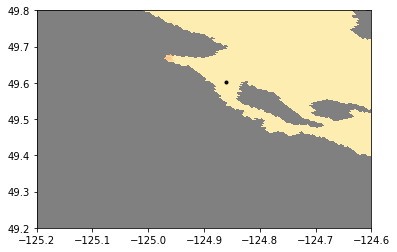

In [8]:
plt.pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,0,:,:]==0,fHC.variables['silicon'][-1,0,:,:]),vmin=40,vmax=70,cmap=cm1)
plt.plot(mesh['nav_lon'][635,126],mesh['nav_lat'][635,126],'k.')
plt.xlim(-125.2,-124.6)
plt.ylim(49.2,49.8)
print(635,126,mesh['nav_lon'][635,126],mesh['nav_lat'][635,126])

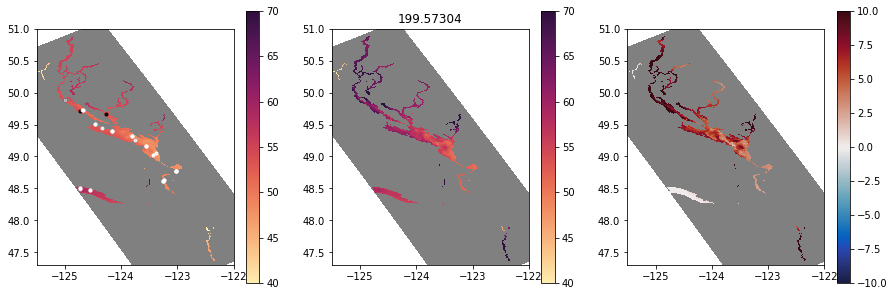

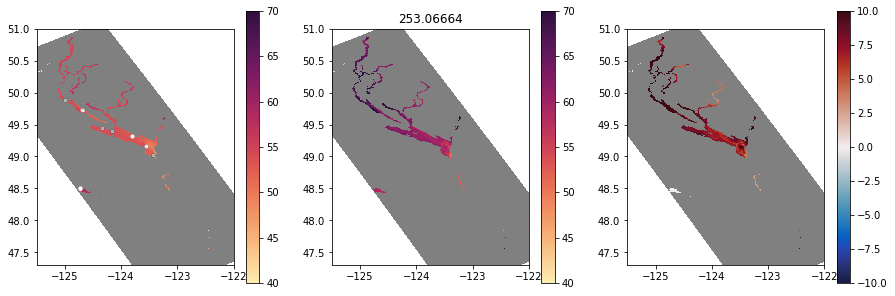

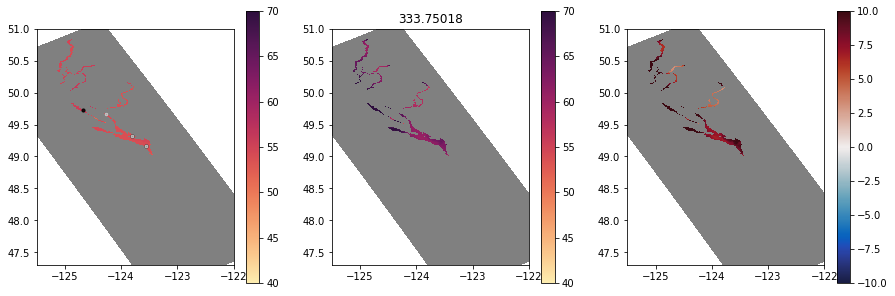

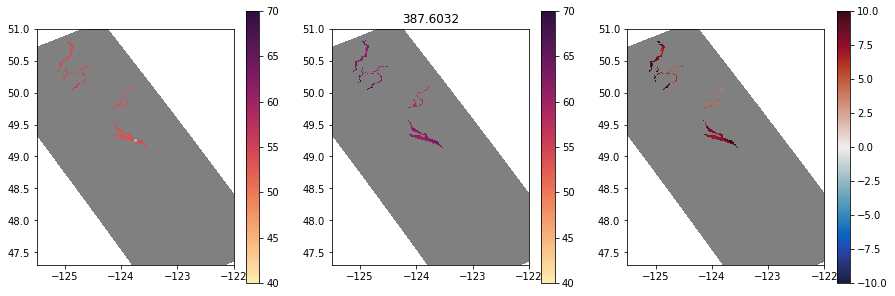

In [11]:
for k in (30,32,35,37):
    dfi=df3.loc[(df3.Z>fHC['deptht_bounds'][k,0])&(df3.Z<fHC['deptht_bounds'][k,1])]
    dfl=df4.loc[(df4.Z>fHC['deptht_bounds'][k,0])&(df4.Z<fHC['deptht_bounds'][k,1])]
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    m0=ax[0].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fHC.variables['silicon'][-1,k,:,:]),vmin=40,vmax=70,cmap=cm1)
    fig.colorbar(m0,ax=ax[0])
    ax[0].set_xlim(-125.5,-122)
    ax[0].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[0],coords='map')
    ax[0].plot(dfi['Lon'],dfi['Lat'],'k.',alpha=.6)
    ax[0].plot(dfl['Lon'],dfl['Lat'],'w.',alpha=.6)
    m1=ax[1].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['silicon'][-1,k,:,:]),vmin=40,vmax=70,cmap=cm1)
    fig.colorbar(m1,ax=ax[1])
    ax[1].set_xlim(-125.5,-122)
    ax[1].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[1],coords='map')
    ax[1].set_title(fHC.variables['deptht'][k])
    m2=ax[2].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['silicon'][-1,k,:,:]-fHC.variables['silicon'][-1,k,:,:]),
                        vmin=-10,vmax=10,cmap=cm2)
    fig.colorbar(m2,ax=ax[2])
    viz_tools.set_aspect(ax[2],coords='map')
    ax[2].set_xlim(-125.5,-122)
    ax[2].set_ylim(47.3,51)

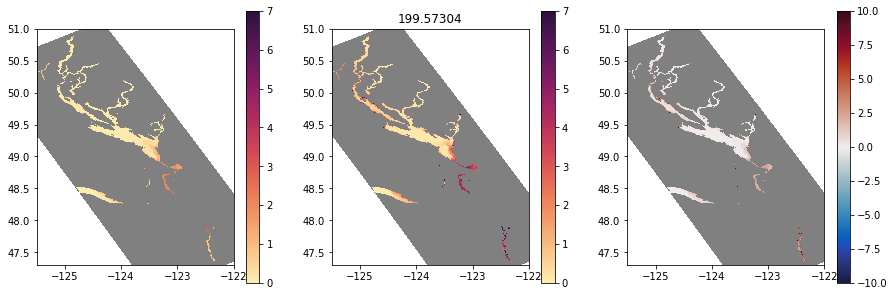

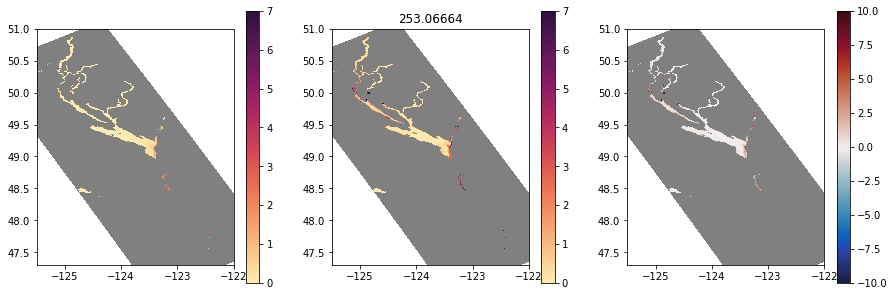

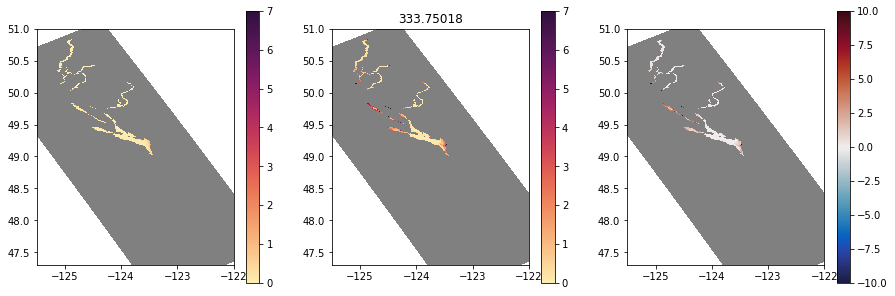

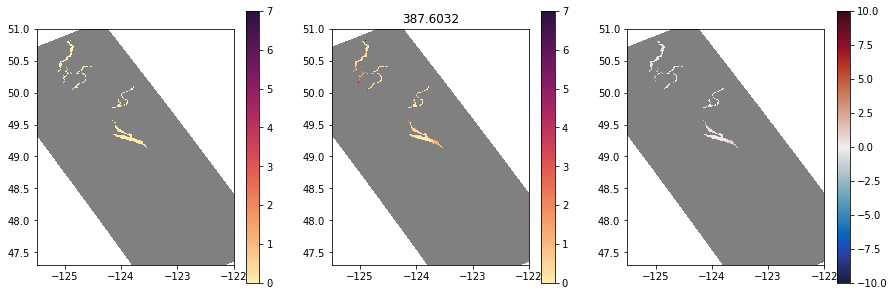

In [12]:
for k in (30,32,35,37):
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    m0=ax[0].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fHC.variables['biogenic_silicon'][-1,k,:,:]),vmin=0,vmax=7,cmap=cm1)
    fig.colorbar(m0,ax=ax[0])
    ax[0].set_xlim(-125.5,-122)
    ax[0].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[0],coords='map')
    m1=ax[1].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['biogenic_silicon'][-1,k,:,:]),vmin=0,vmax=7,cmap=cm1)
    fig.colorbar(m1,ax=ax[1])
    ax[1].set_xlim(-125.5,-122)
    ax[1].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[1],coords='map')
    ax[1].set_title(fHC.variables['deptht'][k])
    m2=ax[2].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['biogenic_silicon'][-1,k,:,:]-fHC.variables['biogenic_silicon'][-1,k,:,:]),
                        vmin=-10,vmax=10,cmap=cm2)
    fig.colorbar(m2,ax=ax[2])
    viz_tools.set_aspect(ax[2],coords='map')
    ax[2].set_xlim(-125.5,-122)
    ax[2].set_ylim(47.3,51)